# Midterm Project 2 (100 points total)

## In this project, you need to use two tree-based ensemble models: Build a Random Forest and an Adaptive Boosting model using scikit-learn library to classify patients with benign and malignant tumors.

### At first, import the necessary libraries. (5 points)

In [1]:
#Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix


### After that, upload the data and preprocess it. (5 points)

In [2]:
# Upload the data, separate the features and the labels into X and y variables
data = pd.read_csv('breast_tumor_classification.csv')
y = data['diagnosis']
X = data.drop(['diagnosis', 'id', 'Unnamed: 32'],axis=1)
# Convert y into 0's and 1's. (0 for B, 1 for M)
map_diagnosis = {'B': 0, 'M' : 1}
y = y.map(map_diagnosis)


### Before starting to build the models, check if your data is ready.

In [3]:
# print(X.head())
# print(y.head())
# print(y[13])

### Split the data into training and test sets. Use a 70-30 split ratio.

In [4]:
#Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

### Create two classifiers: One Random Forest and one Adaptive Boosting. Use a random_state of 12 for both classifier objects. (10 points)

In [5]:
# Create the Random Forest
rf = RandomForestClassifier(random_state=12) # types of parameters?

# Create the Adaptive Boosting
ab = AdaBoostClassifier(DecisionTreeClassifier(random_state=12), random_state=12) # types of parameters?



### Create two hyperparameter grids for the two classifiers. Keep in mind that both classifiers need number of trees as the first hyperparameter. The second hyperparameter is up to you. Your options are max_depth, min_samples_leaf and max_leaf_nodes. (20 points)

In [6]:
# Create the hyperparameter grid for Random Forest
hp_grid_rf = {'n_estimators': [5,10,15,20,25,30,35], 'max_depth': [1,3,5,7,9,11,13]} # no. of trees?
# Create the hyperparameter grid for Adaptive Boosting
hp_grid_ab = {'n_estimators': [5,10,15,20,25,30,35], 'base_estimator__max_depth': [1,3,5,7,9,11,13]}

### Using the grids you defined above, implement the grid search for both tree-based ensembles. Do a 5-fold cross-validation and keep in mind that the task is classification. (20 points)

In [7]:
# Grid search object for Random Forest
clf_rf = GridSearchCV(rf, hp_grid_rf, cv=5, scoring='balanced_accuracy') # scoring ?
# Grid search object for Adaptive Boosting
clf_ab = GridSearchCV(ab, hp_grid_ab, cv=5, scoring='balanced_accuracy')

# Train both objects with the training data
clf_rf.fit(X_train, y_train)
clf_ab.fit(X_train, y_train)




GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=12),
                                          random_state=12),
             param_grid={'base_estimator__max_depth': [1, 3, 5, 7, 9, 11, 13],
                         'n_estimators': [5, 10, 15, 20, 25, 30, 35]},
             scoring='balanced_accuracy')

### Before you pick the best hyperparameters, visualize your both grid searches with a heatmap. (5 points)

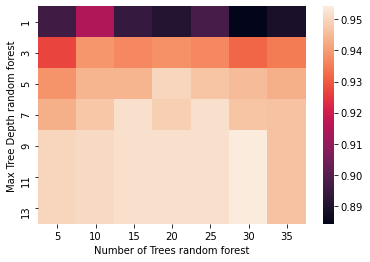

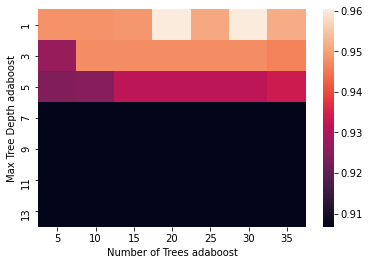

In [8]:
cv_results_rf = clf_rf.cv_results_
cv_results_ab = clf_ab.cv_results_


df_results_rf = pd.DataFrame(cv_results_rf)
df_results_ab = pd.DataFrame(cv_results_ab)

 
#visualise rf
df_results_rf = df_results_rf[['param_max_depth', 'param_n_estimators' ,'mean_test_score']]

df_results_tabular_rf = df_results_rf.pivot(index = 'param_max_depth', columns ='param_n_estimators', values = 'mean_test_score')

# df_results_tabular_rf = np.sqrt(-df_results_tabular_rf)

sns.heatmap(df_results_tabular_rf)
plt.xlabel('Number of Trees random forest')
plt.ylabel('Max Tree Depth random forest')
plt.show()


#visualise ab
df_results_ab = df_results_ab[['param_base_estimator__max_depth', 'param_n_estimators' ,'mean_test_score']]

df_results_tabular_ab = df_results_ab.pivot(index = 'param_base_estimator__max_depth', columns ='param_n_estimators', values = 'mean_test_score')

# df_results_tabular_ab = np.sqrt(-df_results_tabular_ab)

sns.heatmap(df_results_tabular_ab)
plt.xlabel('Number of Trees adaboost')
plt.ylabel('Max Tree Depth adaboost')
plt.show()





###  Extract the best hyperparameter values from the trained grid search objects and using them, train your final Random Forest and Adaptive Boosting models. For both, evaluate the test performance. Print the accuracy score and the confusion matrix. (25 points)

In [9]:
# Extract the best hyperparameter values

    #random forest best hyperparameter values
best_hyperparam_rf = clf_rf.best_params_
best_n_est_rf = best_hyperparam_rf['n_estimators']
best_max_depth_rf = best_hyperparam_rf['max_depth']

    #adaboost best hyperparameter values
best_hyperparam_ab = clf_ab.best_params_
best_n_est_ab = best_hyperparam_ab['n_estimators']
best_max_depth_ab = best_hyperparam_ab['base_estimator__max_depth']

# Create the final models
rf_best = RandomForestClassifier(n_estimators=best_n_est_rf, max_depth=best_max_depth_rf , random_state=12)
ab_best = AdaBoostClassifier(n_estimators=best_n_est_ab, random_state=12)

# Train the final models
rf_best.fit(X_train, y_train)
ab_best.fit(X_train, y_train)

# Evaluate them using test data and print the final results.
y_pred_rf = rf_best.predict(X_test)
y_pred_ab = ab_best.predict(X_test)


#random forest accuracy and confusion matrix
test_score_rf = accuracy_score(y_test, y_pred_rf)
print("random forest confusion matrix")
print(confusion_matrix(y_test, y_pred_rf))
print("Best hyperparameter value random forest: "+str(best_hyperparam_rf)+"     Test acc: " + str(test_score_rf*100))


#adaboost accuracy and confusion matrix
test_score_ab = accuracy_score(y_test, y_pred_ab)
print("adaboost confusion matrix")
print(confusion_matrix(y_test, y_pred_ab))
print("Best hyperparameter value adaboost: "+str(best_hyperparam_ab)+"     Test acc: " + str(test_score_ab*100))





random forest confusion matrix
[[106   2]
 [  3  60]]
Best hyperparameter value random forest: {'max_depth': 9, 'n_estimators': 30}     Test acc: 97.07602339181285
adaboost confusion matrix
[[105   3]
 [  3  60]]
Best hyperparameter value adaboost: {'base_estimator__max_depth': 1, 'n_estimators': 30}     Test acc: 96.49122807017544


### Lastly, give an example for a real-life clinical situation where a K-Nearest Neighbors (KNN) model that is built in an app or a medical device would not be useful. Remember the shortcomings of KNN models that we have discussed in class. (10 points)

In [10]:
print('In Polysomnography, patients’ data can be collected by using sensors to record eye movements, brain waves, heart rhythm and body movements. If a KNN algorithm is to be implemented on a medical device that is used to detect a sleep disorder, then it would require calculating multiple steps for each new data instance. In this situation the amount of data is very large with lot of instances. So in that case for every new instance, the algorithm must calculate distance between the new data point and all the instances in the training data, sort the training instances in right order based on the distance calculated. Then based on the no. of neighbors specified in the algorithm, the algorithm will choose the k nearest neighbors and then classify the new instance in one of the categories. This will be very computationally heavy for a medical device and therefore, the KNN algorithm in that case will not be very useful. ')

In Polysomnography, patients’ data can be collected by using sensors to record eye movements, brain waves, heart rhythm and body movements. If a KNN algorithm is to be implemented on a medical device that is used to detect a sleep disorder, then it would require calculating multiple steps for each new data instance. In this situation the amount of data is very large with lot of instances. So in that case for every new instance, the algorithm must calculate distance between the new data point and all the instances in the training data, sort the training instances in right order based on the distance calculated. Then based on the no. of neighbors specified in the algorithm, the algorithm will choose the k nearest neighbors and then classify the new instance in one of the categories. This will be very computationally heavy for a medical device and therefore, the KNN algorithm in that case will not be very useful. 
